In [1]:
# All required libraries and functions  are imported in this cell
from __future__ import division     # Enable floating point division i.e. 3/4=0.75 insted of 0
from IPython.utils import io        # Suppress undesired print commands  
import os as os                     # Operating system funcitons for navigation pursposes
import numpy as np                  # Numerical Library for matrix operations
import matplotlib.pyplot as plt     # Plotting Library 
import scipy.optimize as spo
import warnings as iw

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Sharp plots  
iw.filterwarnings(action='ignore')

data_dir="C:/GitHub/ML_Coursera/ex2/data/"

## A: Supporting functions

###### Collection of supporting functions that are provided in the exercise 

In [2]:
# Logistic Regression hypothesis function
def lg_hyp(X,theta):                   
    Xtheta=np.matmul(X, theta)
    return 1/(1+np.e**(-Xtheta))   

# Sort +ve and -ve examples 
def data_sort(y):                                               
    pos = []
    neg = []
    for i in np.arange(len(y)):
        if y[i]==1 : pos.append(i)
        else    : neg.append(i)
    return pos,neg 

# Partial derivative of the cost function (vectorized)
def costPrimeFunction(theta, X, y,lambdA=0): 
    H=lg_hyp(X,theta)
    t1     = np.matmul(X.T,(H-y))/m
    t2_reg = (lambdA/m)*theta
    t2_reg[0] = 0
    gradient = t1+t2_reg
    return gradient

# Plot Decision bounary for example 1 
def plotDecisionBoudaryA(data, theta):
        plot_x = np.array([min(data[:,0]), max(data[:,0])])
        plot_y = (-1/theta[2])*(theta[1]*plot_x + theta[0])
        plt.plot([plot_x[0], plot_y[0]], [plot_x[1], plot_y[1]],'b-',\
                 lw=0.5, label= 'Decision boundary')
        plt.legend(loc=1)
        plt.show() 

        
# Plot Decision bounary for example 2
def plotDecisionBoundaryB(theta,fig_dt,lambdA):
    xg = np.linspace(-1, 1.5, 50)
    yg = np.linspace(-1, 1.5, 50)
    z  = np.zeros((len(xg),len(yg)))
    for i in np.arange(len(xg)):
        for j in np.arange(len(yg)):
            a  = xg[i] 
            b  = yg[j]
            with io.capture_output() as captured:
                ft = mapFeature([a],[b],6);
            z[i][j]= np.matmul(ft,theta)[0]
    z=z.T
    plotData(data,fig_dt)
    plt.hold=True
    plt.text(1.1, -0.92,'lambda = %i'%lambdA )
    plt.contour(xg,yg,z,[0],colors=['g'])

## B: Utility Functions

###### Data Retival and configurating functions 

In [3]:
# Return the contents of the data file
def load_data(data_dir,f_name):                       
    os.chdir(data_dir)
    data=np.loadtxt(f_name,delimiter=',')
    return data

# Generate a dicitonary of plotting parameters, makes it easier to edit and and similar figures
def fig_details(limits,figspan,title_pos,marker,markersize,markeredgecolor,linewidth,markeredgewidth, \
                xlabel='',ylabel='',title='',label='',grid=False):
    fig_dt={}
    fig_dt['limits']=limits
    fig_dt['figspan']=figspan
    fig_dt['xlabel']=xlabel
    fig_dt['ylabel']=ylabel
    fig_dt['label']=label
    fig_dt['title']=title
    fig_dt['title_pos']=title_pos
    fig_dt['mk']=marker
    fig_dt['ms']=markersize
    fig_dt['mec']=markeredgecolor
    fig_dt['lw']=linewidth
    fig_dt['grid']=grid
    fig_dt['mew']=markeredgewidth
    return fig_dt

## 1 Logistic Regression 

## 1.1 Visualizing the data

In [4]:
data = load_data(data_dir,'ex2data1.txt')        # Load data
x    = data[:,:-1]                               # features
y    = data[:,-1]                                # predicted values

In [5]:
def data_sort(y):                  # Return list containing indices of +ve and -ve examples                         
    pos = []
    neg = []
    for i in np.arange(len(y)):
        if y[i]==1 : pos.append(i)
        else    : neg.append(i)  
    return pos,neg                            

###### plotData-----------------------------------------------------------------------------------------------------------------------------------------------------

In [6]:
def plotData(data,fig_dt):      # Configured plot +ve and -ve examples
    pos, neg = data_sort(data[:,-1])
    X = data[:,:-1]
    y = data[:,-1]
    plt.figure(figsize=fig_dt['figspan'])
    
    plt.plot(X[:,0][pos], X[:,1][pos], fig_dt['mk'][0], ms=fig_dt['ms'][0],mec=fig_dt['mec'][0],lw=fig_dt['lw'][0], \
             label=fig_dt['label'][0],mew=fig_dt['mew'][0])
    plt.plot(X[:,0][neg], X[:,1][neg], fig_dt['mk'][1], ms=fig_dt['ms'][1],mec=fig_dt['mec'][1],lw=fig_dt['lw'][1], \
             label=fig_dt['label'][1],mew=fig_dt['mew'][1])
    plt.xlabel(fig_dt['xlabel'])
    
    plt.ylabel(fig_dt['ylabel'])
    plt.title(fig_dt['title'], y=fig_dt['title_pos'])
    plt.axis(fig_dt['limits'])
    plt.legend()
    #plt.grid(fig_dt['grid'],linestyle='dotted')   

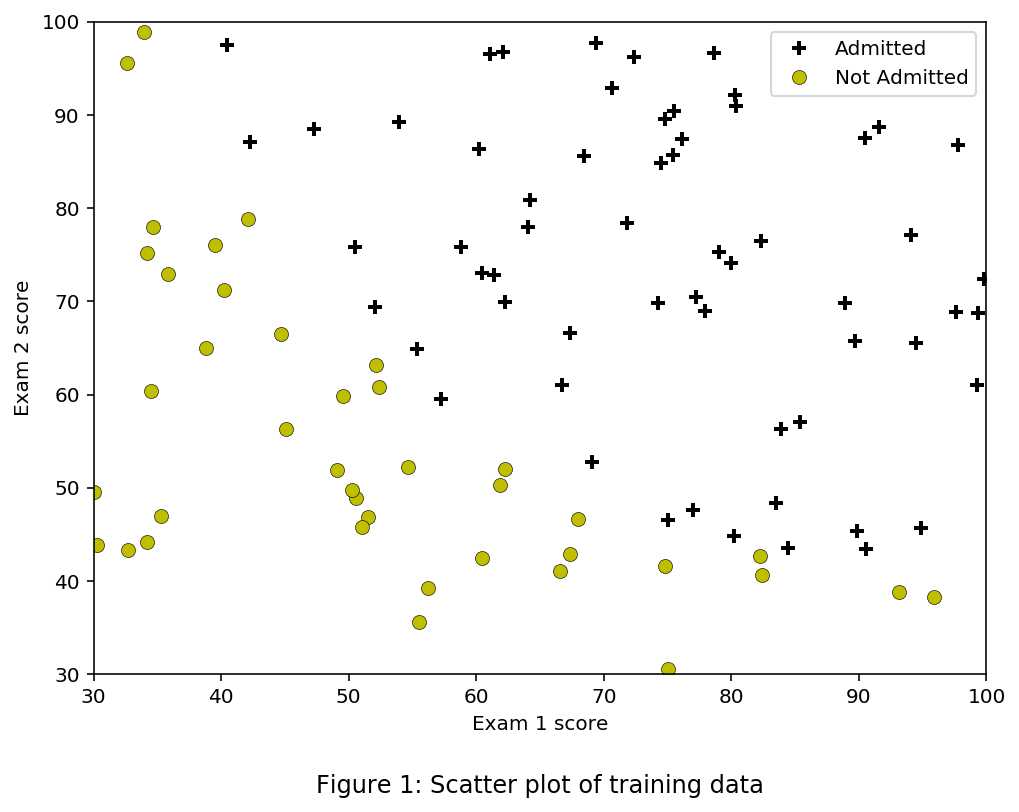

In [7]:
# Execute the Utilty function for plotData to generate fig_dt
fig_dt=fig_details(limits=[30, 100, 30, 100],figspan=(8,6),xlabel='Exam 1 score',\
                  ylabel='Exam 2 score', label=['Admitted','Not Admitted'], \
                  title='Figure 1: Scatter plot of training data',\
                  title_pos=-0.2,marker=['k+','yo'],markersize=[7,7],markeredgecolor=['k','k'],\
                  linewidth=[10,10],markeredgewidth=[2,0.3],grid=False)
# Execute plotData
plotData(data,fig_dt)

## 1.2 Implementation 

### 1.2.1 Warmup exercise: sigmoid function

#### sigmoid function----------------------------------------------------------------------------------------------------------------------------

In [8]:
def sigmoid(X):
    return 1/(1+np.e**(-X))

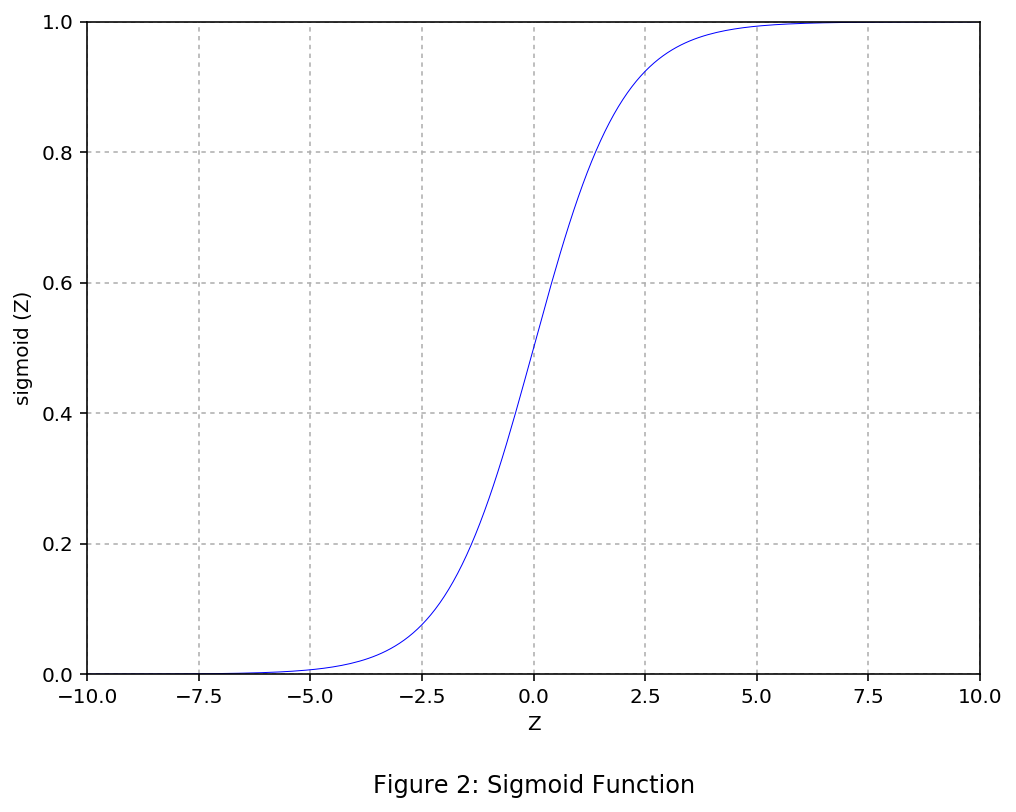

In [9]:
z=np.arange(-10,10,0.1)
y=sigmoid(z)
plt.figure(figsize=(8,6))
plt.plot(z,y,'b-',lw=0.5)

# formatting stuff
plt.axis([-10,10,0,1])
plt.grid(True,linestyle='dotted')
plt.xlabel('Z')
plt.ylabel('sigmoid (Z)')
plt.title('Figure 2: Sigmoid Function',y=-0.2)

### 1.2.2 Cost function and gradient 

In [10]:
# Define Logistic Resgression Hypothesis Function
def lg_hyp(X,theta):
    Xtheta=np.matmul(X, theta)
    return 1/(1+np.e**(-Xtheta))

##### costFunction---------------------------------------------------------------------------------------------------------------------------------

In [11]:
# Define cost function for logistic regression
def costFunction(theta,X,y,lambdA=0):
    H=lg_hyp(X,theta)
    
    t1 = -np.matmul(y.T    , np.log(H))/m
    t2 = -np.matmul((1-y).T, np.log(1-H))/m
    t3_reg   = lambdA/(2*m)*np.matmul(theta[1:].T,theta[1:])
    
    cost=t1+t2+t3_reg
    return cost

In [12]:
# Reassing x,y and get values for other required parameters
x     = data[:,:-1]
y     = data[:,-1]
m     = data.shape[0]
x_mat = np.c_[np.ones(m),x]
n     = x_mat.shape[1]
itheta= np.zeros(n)
lambdA=0

icost=costFunction(X=x_mat,y=y,theta=itheta,lambdA=0)
print "Computed Cost %f"%icost
print "Expected Cost 0.693"

Computed Cost 0.693147
Expected Cost 0.693


In [13]:
# Partial derivative of the cost function (vectorized)
def costPrimeFunction(theta, X, y,lambdA=0):
    H=lg_hyp(X,theta)
    t1     = np.matmul(X.T,(H-y))/m
    t2_reg = (lambdA/m)*theta
    t2_reg[0] = 0
    gradient = t1+t2_reg
    return gradient

In [14]:
# Test derivative function provides a desired output
partial_der=costPrimeFunction(itheta,x_mat,y,lambdA=0)
print partial_der

[ -0.1        -12.00921659 -11.26284221]


This is a specific example where you really get to experience and appreciate the true power of  having readily available libraries of optimizing functions. I ran the gradientDescent code for logistic regression function, similar to the ones used in ex1. it took 20-25 min for it to get close to the optimzied solution. The optimizing function did in few seconds.

In [15]:
def blackbox_optimizer(itheta, X, y, lambdA):
        return spo.fmin_bfgs(costFunction, x0=itheta, args=(x_mat, y, lambdA), maxiter=400, \
                      fprime=costPrimeFunction,disp=True,full_output=True)
        
fn_opt=blackbox_optimizer(itheta,x_mat,y,lambdA=0)
theta=fn_opt[0]
fcost=fn_opt[1]

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31


In [16]:
print 'Final computed cost: %f'%fcost, "\n",\
      'Expected cost      : 0.203 '

Final computed cost: 0.203498 
Expected cost      : 0.203 


### 1.2.4 Evaluating logistic regression

In [17]:
# Probability for admission for student with an Exam 1 score of 45 and an Exam 2 score of 85
x_test = [1, 45, 85]                                            # vectorized x
admisssion_probability = lg_hyp(x_test,theta)                   # logistic regression hypothesis

print 'Computed admission probability: %f'%admisssion_probability, "\n",\
      'Expected admission probability: 0.776'

Computed admission probability: 0.776291 
Expected admission probability: 0.776


#### predict------------------------------------------------------------------------------------------------------------------------------------------

In [18]:
# Define Classifier funtion
def predict(X,y,theta):
    m    = len(y)                                  
    pvec = lg_hyp(X,theta)                        # predicted probabilities pvec
    yp   = (pvec+0.5).astype(int)                 # decision rule, if p>=0.5,y=1,esle y=0
    pct_Accuracy = (1-np.sum((yp-y)**2)/m)*100
    return pct_Accuracy

In [19]:
pct_Accuracy=predict(X=x_mat,y=y,theta=theta)
print "Training Accuracy of the classifier : %0.2f%% "%pct_Accuracy

Training Accuracy of the classifier : 89.00% 


#### plotDecisionBoundary------------------------------------------------------------------------------------------------------------------- 

Let's understand more about decision boundary. The decision rule states that if predicted probability, p>=0.5 we predict y=1 else y=0. However specifically, it would state that: if p<0.5: y=0, p>0.5:y=1,so p=0.5 is value where we switch our values of y. Thus next question to ask is when is p=0.5?  Hypothesis function : 1/(1+e**(-Z)) =0.5 for Z=0, where Z=np.matmul(X,theta)=0. So in order to plot the decision boundary we need to generate a plot over grid points X's (here x1,x2),P and take contour where p=0.5. in the x1,x2 plane.

In [20]:
# Plot Decision bounary for example 1: Student admission
def plotDecisionBoudaryA(data, theta):
        plot_x = np.array([min(data[:,0]), max(data[:,0])])
        plot_y = (-1/theta[2])*(theta[1]*plot_x + theta[0])
        plt.plot([plot_x[0], plot_y[0]], [plot_x[1], plot_y[1]],'b-',\
                 lw=0.5, label= 'Decision boundary')
        plt.legend(loc=1)
        plt.show()      

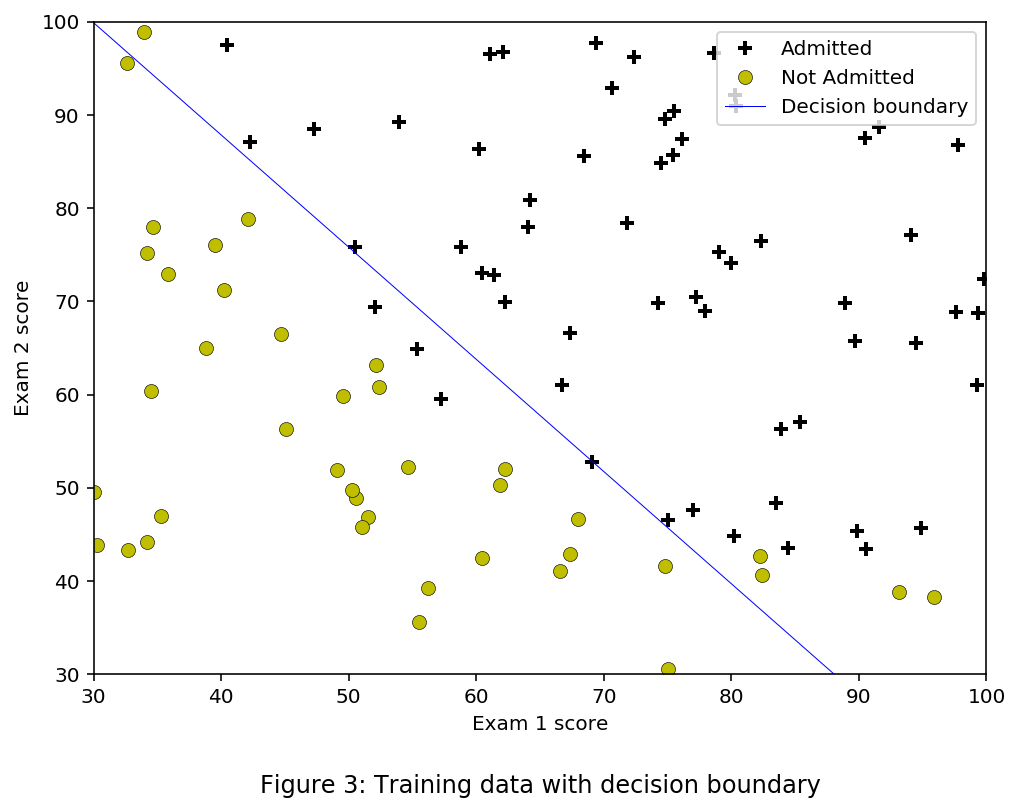

In [21]:
fig_dt['title']='Figure 3: Training data with decision boundary'
plotData(data,fig_dt)
plotDecisionBoudaryA(data,theta)  

Minor Note: It is not enitrely clear to me why the decision bounday differs slightly from the one in the ex2.pdf (fig2). However, I was able to get closer result after rounding the theta's and X's, but I chose not to do it.

## 2 Regularized logistic regresssion

### 2.1 Visualizing the data

In [22]:
data=load_data(data_dir,'ex2data2.txt')            # Load data
# Reset plot variable for new example: fig_dt
fig_dt=fig_details(limits=[-1, 1.5, -1, 1.2],figspan=(8,6),xlabel='Microchip Test 1',\
                  ylabel='Microchip Test 2', label=['y = 1','y = 0'], \
                  title='Figure 4: Plot of training data',\
                  title_pos=-0.2,marker=['k+','yo'],markersize=[7,7],markeredgecolor=['k','k'], \
                  linewidth=[10,10],markeredgewidth=[2,0.3],grid=False)

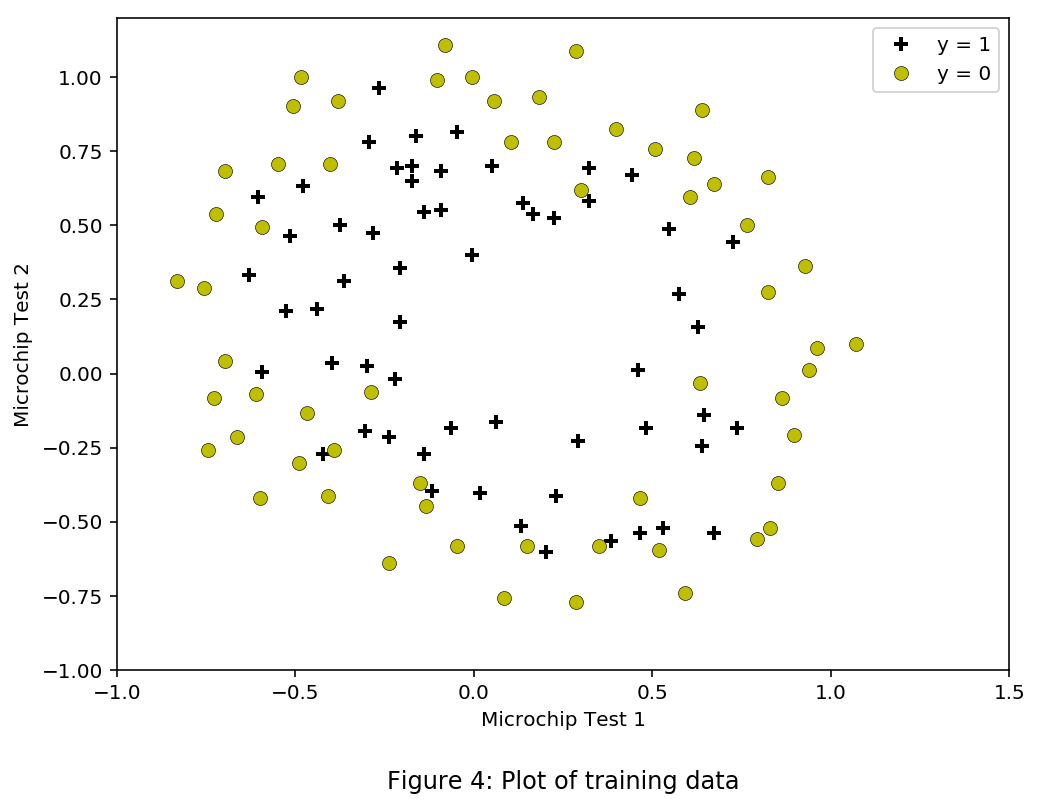

In [23]:
plotData(data,fig_dt)

### 2.2 Feature mapping

#### mapFeature-----------------------------------------------------------------------------------------------------------------------------------

In [24]:
# Gereate new feature to develop non-linear hypothesis
def mapFeature(x1, x2 ,poly_deg):      
    m=len(x1)
    ct=1
    print [0, 0]
    feature_mat=np.array(np.ones(m))
    for i in np.arange(1,poly_deg+1,1):
        for j in np.arange(0,i+1):
            feature=np.multiply(x1**j,x2**(i-j))
            feature_mat=np.c_[feature_mat,feature]
            print [i, j],
            ct+=1
        print ""
    print 'Dimensions: ',ct        
    return feature_mat

In [25]:
data   = load_data(data_dir, 'ex2data2.txt')
m      = data.shape[0]

x_mat  = mapFeature(x1=data[:,0], x2=data[:,1],poly_deg=6);
n      = x_mat.shape[1]
itheta = np.zeros(n)
y      = data[:,-1]

[0, 0]
[1, 0] [1, 1] 
[2, 0] [2, 1] [2, 2] 
[3, 0] [3, 1] [3, 2] [3, 3] 
[4, 0] [4, 1] [4, 2] [4, 3] [4, 4] 
[5, 0] [5, 1] [5, 2] [5, 3] [5, 4] [5, 5] 
[6, 0] [6, 1] [6, 2] [6, 3] [6, 4] [6, 5] [6, 6] 
Dimensions:  28


## 2.3 Cost function and gradient

lambdA=1

In [26]:
fn_opt=blackbox_optimizer(itheta=itheta,X=x_mat,y=data[:,-1],lambdA=1)
theta=fn_opt[0]

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48


## 2.4 Plotting the decision boundary 

In [27]:
# Plot Decision bounary for example 2: Microchip problem
def plotDecisionBoundaryB(theta,fig_dt,lambdA):
    xg = np.linspace(-1, 1.5, 50)         # Set up a grid
    yg = np.linspace(-1, 1.5, 50)
    z  = np.zeros((len(xg),len(yg)))
    for i in np.arange(len(xg)):
        for j in np.arange(len(yg)):
            a  = xg[i]
            b  = yg[j]
            with io.capture_output() as captured: # Suppress print o/p
                ft = mapFeature([a],[b],6);    # Generate new feature to compute Z
            z[i][j]= np.matmul(ft,theta)[0]    # Evaluate function over grid
    z=z.T
    plotData(data,fig_dt)
    plt.hold=True
    plt.text(1.05, -0.92,'lambda = %i'%lambdA )
    plt.contour(xg,yg,z,[0],colors=['g'])

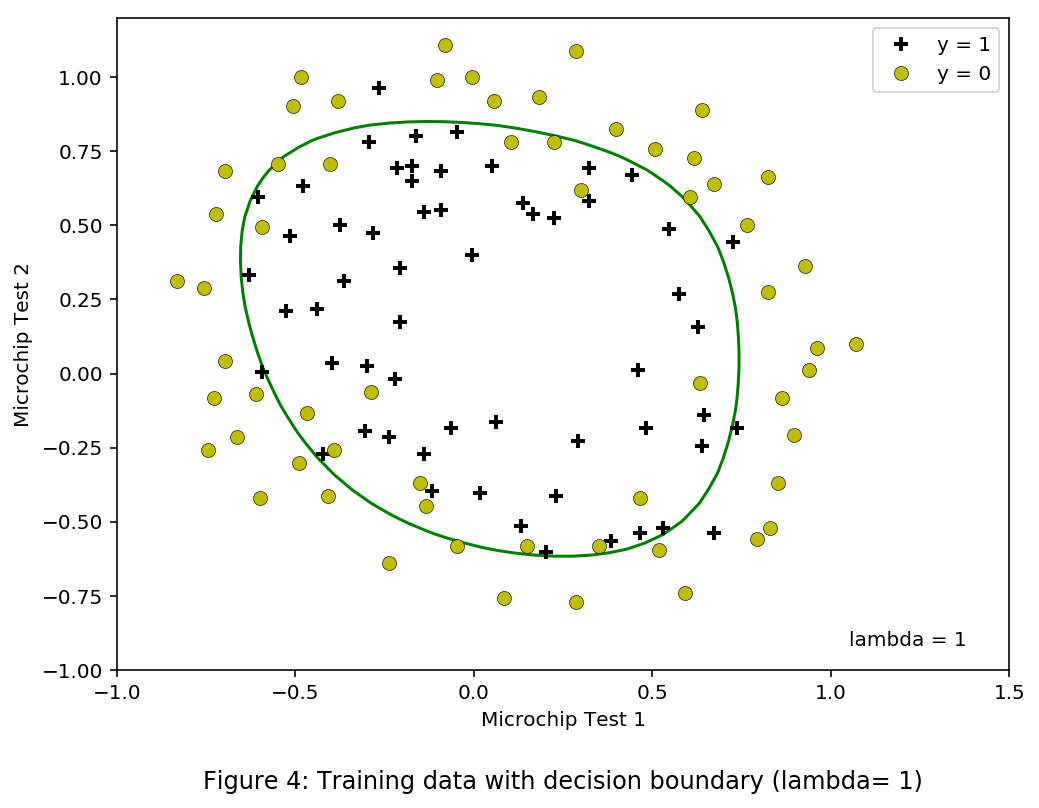

In [28]:
fig_dt['title']='Figure 4: Training data with decision boundary (lambda= 1)'
plotDecisionBoundaryB(theta,fig_dt,lambdA=1)

In [29]:
pct_Accuracy=predict(X=x_mat,y=y,theta=fn_opt[0])
print "Training Accuracy of the classifier : %0.2f%% "%pct_Accuracy, '\n',\
      "Intermediate value of lambda=1 results in LOWER SENSITIVITY to training data (comapred with lambda=0) but promises to MITIGATE OVERFITTING."   

Training Accuracy of the classifier : 83.05%  
Intermediate value of lambda=1 results in LOWER SENSITIVITY to training data (comapred with lambda=0) but promises to MITIGATE OVERFITTING.


## 2.5 Optional (ungraded) exercises

lambdA = 0

In [30]:
fn_opt=blackbox_optimizer(itheta=itheta,X=x_mat,y=data[:,-1],lambdA=0)

         Current function value: 0.263499
         Iterations: 400
         Function evaluations: 401
         Gradient evaluations: 401


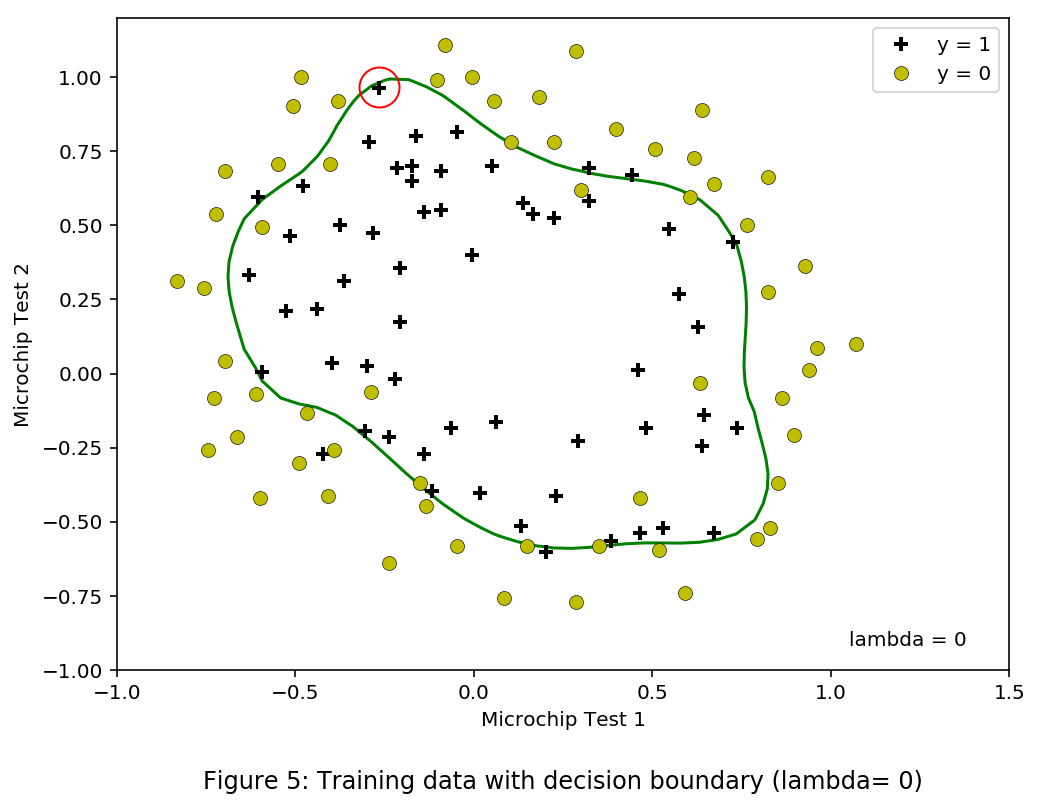

In [31]:
fig_dt['title']='Figure 5: Training data with decision boundary (lambda= 0)'
plotDecisionBoundaryB(theta=fn_opt[0],fig_dt=fig_dt,lambdA=0)
plt.plot(-0.265,0.965,'ro',ms=20,mfc='None',mec='r')

Minor Note: This is not a good decision boundary: for example, it predicts
that a point at x = (−0:25; 1:5) is accepted (y = 1), which seems to be an
incorrect decision given the training set. (ref: ex2.pdf).
This also reminds me that such a data can be fit using a co-related gaussian.

In [32]:
pct_Accuracy=predict(X=x_mat,y=y,theta=fn_opt[0])
print "Training Accuracy of the classifier : %0.2f%% "%pct_Accuracy,'\n', \
      "Model with lambda=0 is more SENSATIVE to training data but is PRONE to OVERFITTING."

Training Accuracy of the classifier : 88.14%  
Model with lambda=0 is more SENSATIVE to training data but is PRONE to OVERFITTING.


lambdA = 100 

In [33]:
fn_opt=blackbox_optimizer(itheta=itheta,X=x_mat,y=data[:,-1],lambdA=100)

Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8


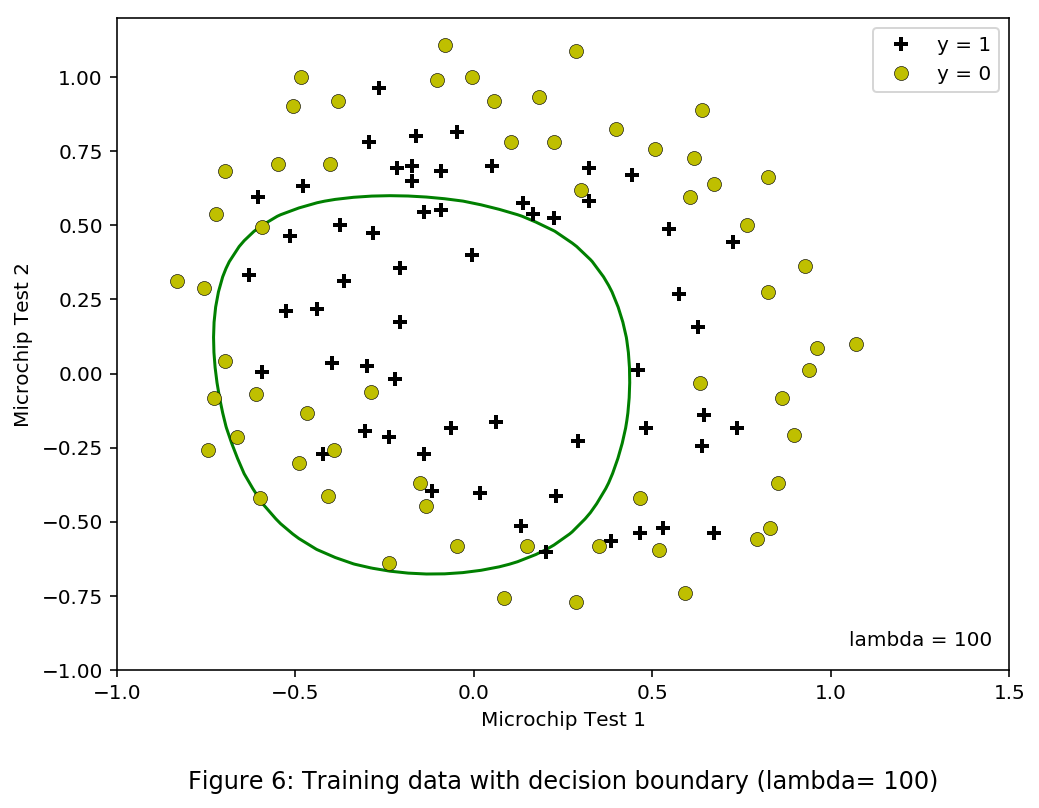

In [34]:
fig_dt['title']='Figure 6: Training data with decision boundary (lambda= 100)'
plotDecisionBoundaryB(theta=fn_opt[0],fig_dt=fig_dt,lambdA=100)

In [35]:
pct_Accuracy=predict(X=x_mat,y=y,theta=fn_opt[0])
print "Training Accuracy of the classifier : %0.2f%% "%pct_Accuracy,'\n', \
      "EXTREME LOSS of CLASSIFIER ACCURACY due to high value of lambda: 100"  

Training Accuracy of the classifier : 61.02%  
EXTREME LOSS of CLASSIFIER ACCURACY due to high value of lambda: 100
